#### Analyze overfits

In [4]:
import pandas as pd
import seaborn as sns

In [29]:
#df_results = pd.read_csv('../out/20.0216 feat/reg_rf_boruta/model_results.csv')
df_results = pd.read_csv('../out/20.0518 Lx/L200only_reg_lm/model_results.csv')

In [30]:
df_results.head()

,model,feature,target,score_train,score_test,corr_test,corr_test_recall,score_p19q4,corr_p19q4,corr_p19q4_recall,feat_id,feat_idx
0,all,all,NDUFS8,0.822095,0.393389,0.652748,1.0,NaN,NaN,NaN,NaN,NaN
1,topfeat,topfeat,NDUFS8,0.732989,0.506332,0.703525,1.0,NaN,NaN,NaN,NaN,NaN
2,top10feat,top10feat,NDUFS8,0.656348,0.565189,0.737242,1.0,0.697506,0.826174,1.0,NaN,NaN
3,univariate,NDUFA8 (4702) [CERES],NDUFS8,0.607593,0.591334,NaN,NaN,NaN,NaN,NaN,96.0,0.0
4,univariate,PTPRG (5793) [CERES],NDUFS8,0.005830,0.003461,NaN,NaN,NaN,NaN,NaN,126.0,1.0


In [31]:
df_results = df_results.loc[df_results.model.str.match('(all|topfeat|top10feat)'),:].copy()

In [32]:
df1 = df_results[['model','score_train']].copy()
df1.rename(columns={'score_train':'score'}, inplace=True)
df1['score_type'] = 'score_train'
df2 = df_results[['model','score_test']].copy()
df2['score_type'] = 'score_test'
df2.rename(columns={'score_test':'score'}, inplace=True)
df = pd.concat([df1,df2])

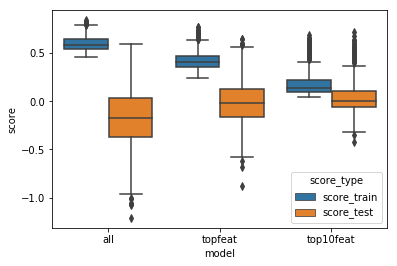

In [33]:
ax = sns.boxplot(x='model', hue='score_type', y='score', data=df)